<a href="https://colab.research.google.com/github/CaseySobon/Image-recognition/blob/main/Image_recognition_multiple_types_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import ELU, PReLU, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
np.random.seed(25)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

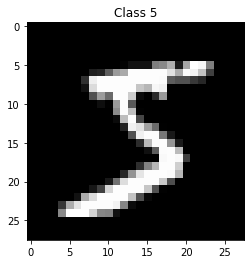

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_109 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 conv2d_79 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_110 (Activation)  (None, 24, 24, 32)       0         
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 10, 10, 64)        18496     
                                                     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
 validation_data=test_generator, validation_steps=10000//64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
937/937 [==============================] - 184s 195ms/step - batch: 468.0000 - size: 63.9658 - loss: 0.1995 - acc: 0.9358 - val_loss: 0.0328 - val_acc: 0.9889
Epoch 2/5
937/937 [==============================] - 183s 195ms/step - batch: 468.0000 - size: 63.9658 - loss: 0.0627 - acc: 0.9813 - val_loss: 0.0260 - val_acc: 0.9919
Epoch 3/5
937/937 [==============================] - 180s 192ms/step - batch: 468.0000 - size: 63.9658 - loss: 0.0453 - acc: 0.9858 - val_loss: 0.0210 - val_acc: 0.9939
Epoch 4/5
937/937 [==============================] - 179s 192ms/step - batch: 468.0000 - size: 63.9658 - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0225 - val_acc: 0.9923
Epoch 5/5
937/937 [==============================] - 179s 191ms/step - batch: 468.0000 - size: 63.9658 - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0208 - val_acc: 0.9935


In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])


Test accuracy:  0.9935


Text(0.5, 1.0, 'Class 2')

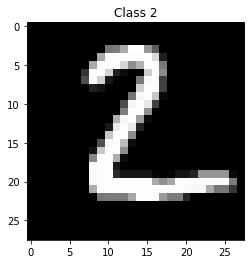

In [ ]:
plt.imshow(X_test[1], cmap='gray')
plt.title('Class '+ str(y_test[1]))

In [ ]:
#predictions = model.predict_classes(X_test)

predictions=model.predict(X_test)
classes_x=np.argmax(predictions,axis=1)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Part 2

In [ ]:
from keras.datasets import cifar10



(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


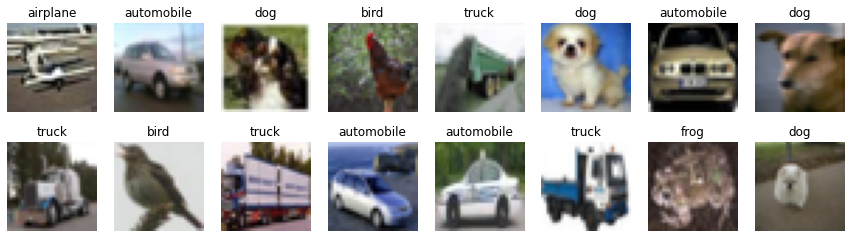

In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

X_train/=255
X_test/=255

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

y_train[0], Y_train[0]

(array([6], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [ ]:

from keras.layers import Convolution2D

# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(Activation('ReLU'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('ReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('ReLU'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('ReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('ReLU'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))



model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_103 (Activation)  (None, 30, 30, 32)       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_104 (Activation)  (None, 28, 28, 32)       0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 12, 12, 64)        18496     
                                                     

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=50000//64, epochs=7,
 validation_data=test_generator, validation_steps=10000//64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/7
781/781 [==============================] - 216s 276ms/step - batch: 390.0000 - size: 63.9385 - loss: 1.5493 - acc: 0.4383 - val_loss: 1.3000 - val_acc: 0.5341
Epoch 2/7
781/781 [==============================] - 216s 277ms/step - batch: 390.0000 - size: 63.9385 - loss: 1.1737 - acc: 0.5821 - val_loss: 1.0254 - val_acc: 0.6388
Epoch 3/7
781/781 [==============================] - 214s 274ms/step - batch: 390.0000 - size: 63.9385 - loss: 0.9999 - acc: 0.6491 - val_loss: 0.8889 - val_acc: 0.6947
Epoch 4/7
781/781 [==============================] - 214s 275ms/step - batch: 390.0000 - size: 63.9385 - loss: 0.8891 - acc: 0.6904 - val_loss: 0.8561 - val_acc: 0.7047
Epoch 5/7
781/781 [==============================] - 216s 276ms/step - batch: 390.0000 - size: 63.9385 - loss: 0.8065 - acc: 0.7193 - val_loss: 0.8301 - val_acc: 0.7233
Epoch 6/7
781/781 [==============================] - 214s 274ms/step - batch: 390.0000 - size: 64.0000 - loss: 0.7505 - acc: 0.7383 - val_loss: 0.7398 - va

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])


Test accuracy:  0.7611
